# Capstone project at Skill Academy

# Car details Dataset Analysis by Suraj Yadav

# Importing a Libraries

In [2]:
import numpy as np
# numpy is aliased as np
import pandas as pd
# pandas is aliased as pd
import matplotlib.pyplot as plt
# pyplot is aliased as plt
import seaborn as sns
# seaborn is alaised as sns

# Uploading a dataset

In [3]:
df=pd.read_csv("C:/Users/Admin/Desktop/Dataset/CAR DETAILS.csv")
df.head() ## print top 5 row

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
# print last 5 rows
df.tail() 

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [5]:
# checking the shape of the dataset
df.shape

(4340, 8)

In [6]:
# print 10 randomly selected data
df.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
2528,Tata Indigo TDI,2013,182000,100000,Diesel,Individual,Manual,First Owner
2868,Maruti Wagon R VXI Minor ABS,2010,260000,50000,Petrol,Individual,Manual,First Owner
2717,Hyundai Getz 1.3 GLS,2008,110000,110000,Petrol,Individual,Manual,Second Owner
1180,Volkswagen Polo Diesel Comfortline 1.2L,2012,225000,120000,Diesel,Individual,Manual,First Owner
3197,Maruti Ertiga VDI,2015,763000,64441,Diesel,Dealer,Manual,First Owner
3366,Tata Indigo GLS,2008,130000,120000,Petrol,Individual,Manual,First Owner
3780,Toyota Innova 2.5 G (Diesel) 7 Seater,2013,700000,70000,Diesel,Individual,Manual,Second Owner
1355,Maruti Wagon R LXI LPG BSIV,2012,220000,80000,LPG,Individual,Manual,Second Owner
3142,Maruti Alto K10 2010-2014 VXI,2010,115999,70000,Petrol,Individual,Manual,First Owner
1361,Maruti Alto K10 2010-2014 VXI,2011,170000,90000,Petrol,Individual,Manual,Second Owner


# Data Pre-Processing

In [7]:
# checking the datatype of dataset
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

## Extract all categorical columns

In [8]:
cat_col=df.select_dtypes(include="object").columns
print(cat_col)

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')


## Extract all numerical columns

In [9]:
num_col=df.select_dtypes(exclude="object").columns
print(num_col)

Index(['year', 'selling_price', 'km_driven'], dtype='object')


## Checking duplicated values

In [10]:
df.duplicated().sum()

763

Here, 763 duplicated values are present, so we will drop all 763 duplicated values

In [11]:
## Dropping duplicated values
df.drop_duplicates(inplace=True)

In [12]:
## Here, we can check duplicated again after dropping and shape of the dataset also
print(df.duplicated().any())
print(df.shape)

False
(3577, 8)


Now, we have a dataset of shape (3577,8)

## Checking null values

In [13]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

There is no null values.

In [14]:
## Number of unique values in the dataset
df.nunique()

name             1491
year               27
selling_price     445
km_driven         770
fuel                5
seller_type         3
transmission        2
owner               5
dtype: int64

In [15]:
df["name"].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [16]:
## Checking the unique values in the fuel column
df["fuel"].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [17]:
## Checking the unique values in the transmission column
df["transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [18]:
## Checking the unique values in the owner column
df["owner"].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [19]:
## Checking the unique values in the seller_type column
df["seller_type"].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [20]:
# creating a brand column using the name of the car
#df['brand'] = df['name'].apply(lambda x:x.split()[0])

In [21]:
df.drop("name", inplace=True, axis=1)

In [22]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


## Statistical Operation

In [23]:
## getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           3577 non-null   int64 
 1   selling_price  3577 non-null   int64 
 2   km_driven      3577 non-null   int64 
 3   fuel           3577 non-null   object
 4   seller_type    3577 non-null   object
 5   transmission   3577 non-null   object
 6   owner          3577 non-null   object
dtypes: int64(3), object(4)
memory usage: 223.6+ KB


In [24]:
## getting statistical data of the dataset
df.describe()

,year,selling_price,km_driven
count,3577.000000,3.577000e+03,3577.000000
mean,2012.962538,4.739125e+05,69250.545709
std,4.251759,5.093018e+05,47579.940016
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


### Checking for outliers in the dataset

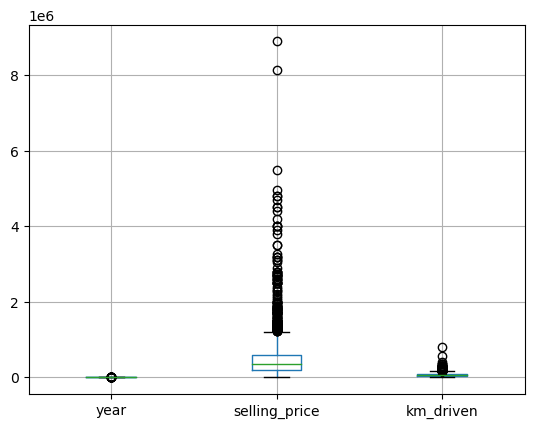

In [25]:
## plotting a boxplot
df.boxplot()
plt.show()

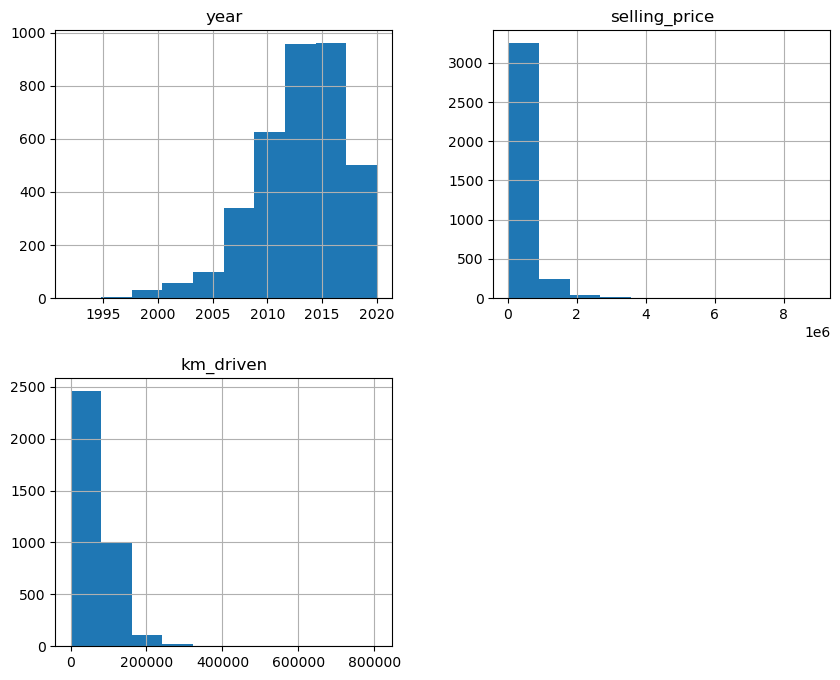

In [26]:
## plotting a histplot
df.hist(figsize=(10,8))
plt.show()

# EDA

In [27]:
a1=df["transmission"].value_counts()
a1

Manual       3265
Automatic     312
Name: transmission, dtype: int64

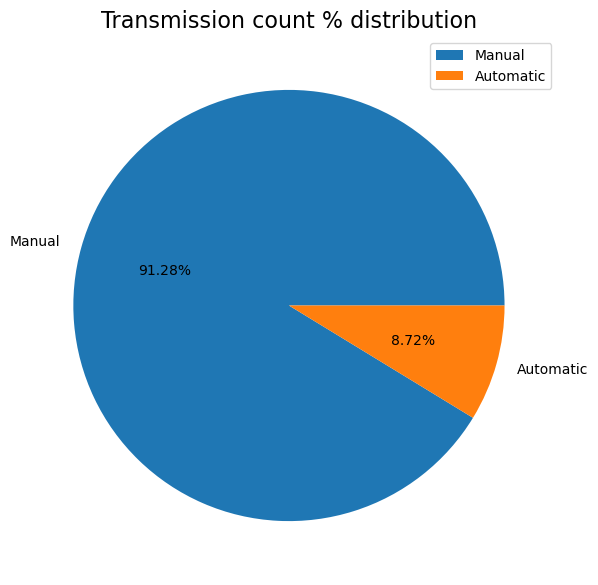

In [28]:
## plot a pie chart for transmission column
plt.figure(figsize=(8,7))
plt.pie(a1.values,labels=a1.index,autopct="%.2f%%")
plt.title("Transmission count % distribution",fontsize=16)
plt.legend()
plt.show()

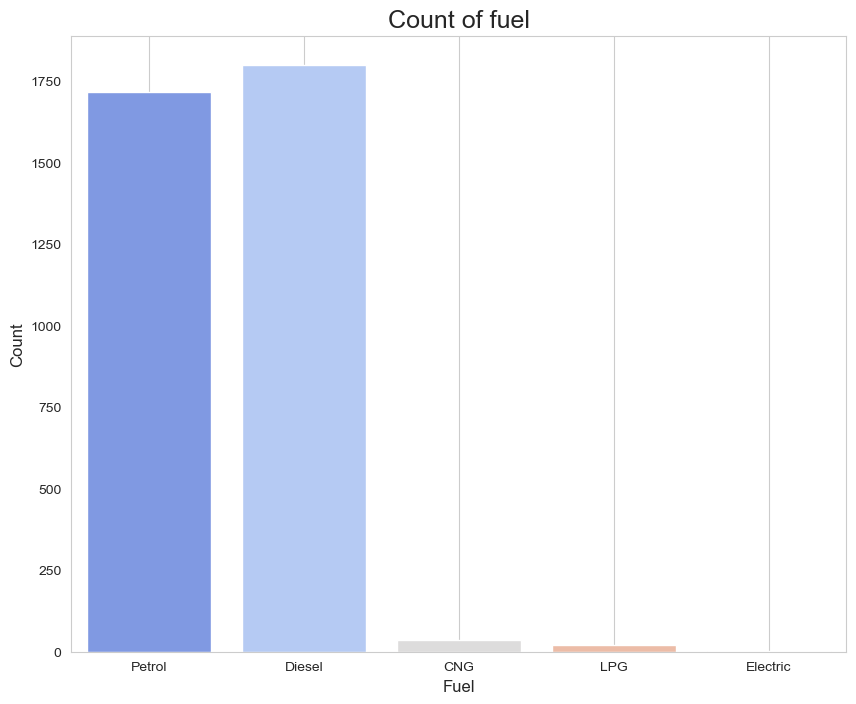

In [29]:
## plotting a countplot for fuel column
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
sns.countplot(x=df["fuel"],palette="coolwarm")
plt.title("Count of fuel",fontsize=18)
plt.xlabel("Fuel",fontsize="12")
plt.ylabel("Count",fontsize="12")
plt.grid()
plt.show()

In [30]:
a2=df["owner"].value_counts()
a2

First Owner             2218
Second Owner             978
Third Owner              289
Fourth & Above Owner      75
Test Drive Car            17
Name: owner, dtype: int64

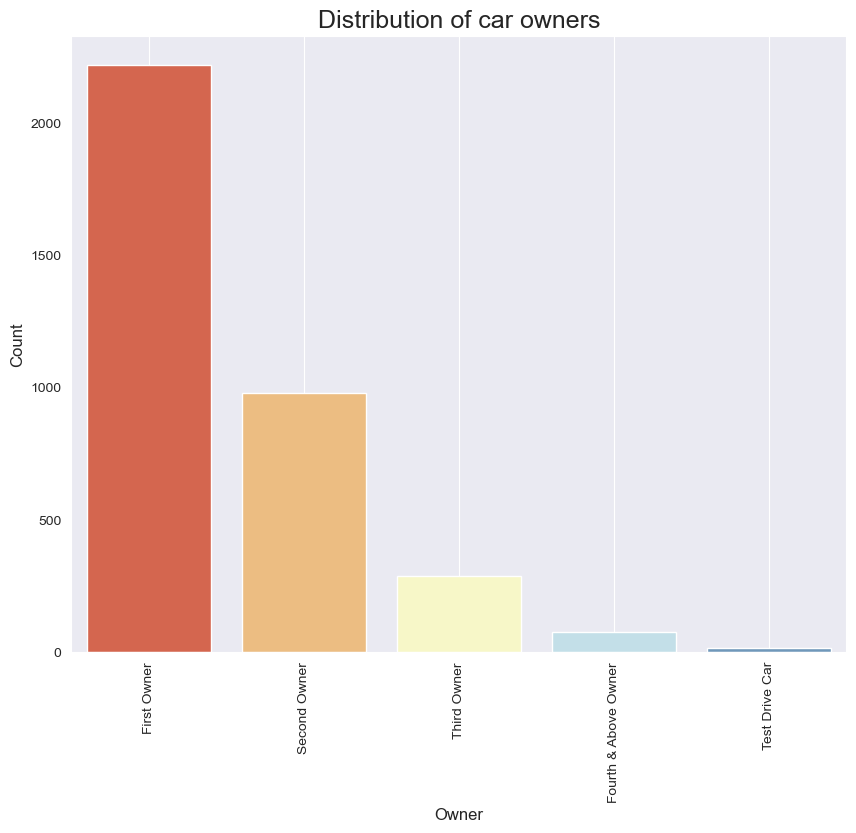

In [31]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
sns.barplot(x=a2.index,y=a2.values,palette="RdYlBu")
plt.title("Distribution of car owners",fontsize=18)
plt.xlabel("Owner",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.grid()
plt.xticks(rotation=90)
plt.show()

In [32]:
a3=df["seller_type"].value_counts()
a3

Individual          2832
Dealer               712
Trustmark Dealer      33
Name: seller_type, dtype: int64

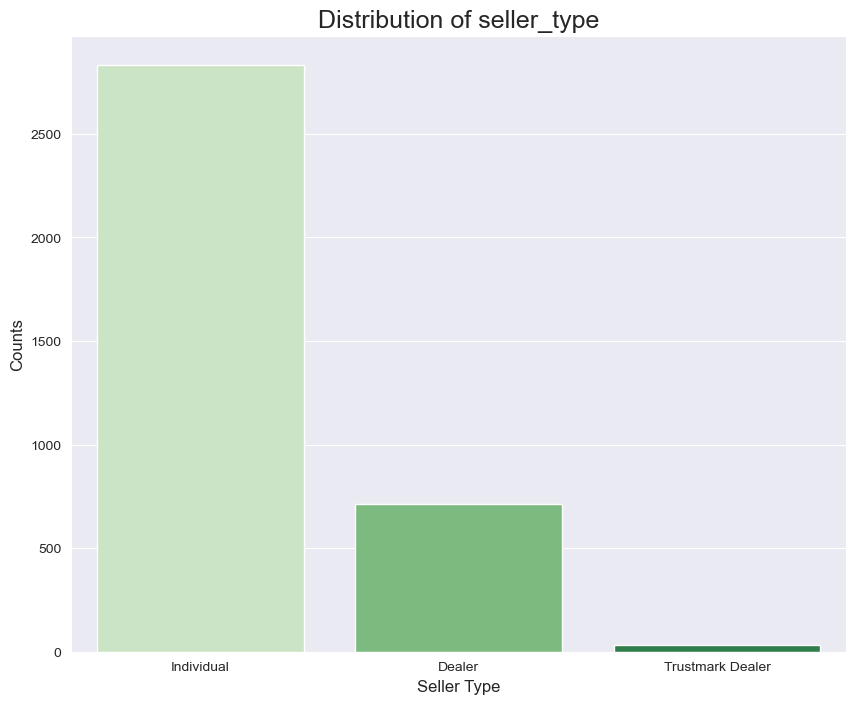

In [33]:
plt.figure(figsize=(10,8))
sns.barplot(x=a3.index,y=a3.values,palette="Greens")
plt.title("Distribution of seller_type",fontsize=18)
plt.xlabel("Seller Type",fontsize=12)
plt.ylabel("Counts",fontsize=12)
plt.show()

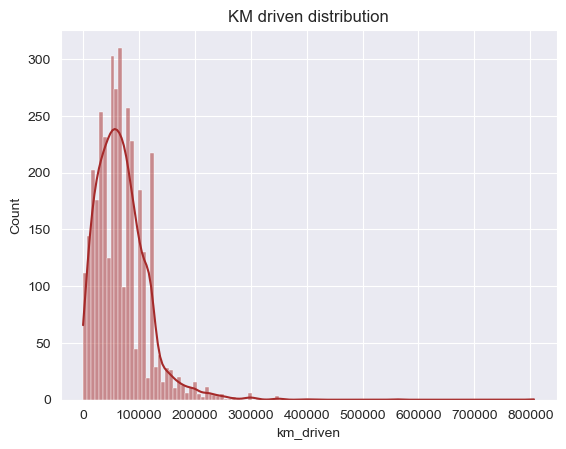

In [34]:
sns.histplot(x="km_driven",kde=True,data=df,color="brown")
plt.title("KM driven distribution")
plt.show()

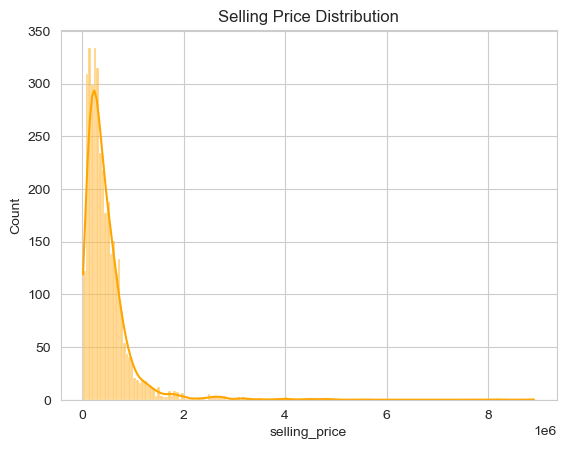

In [35]:
sns.set_style("whitegrid")
sns.histplot(x="selling_price",kde=True,data=df,color="orange")
plt.title("Selling Price Distribution")
plt.show()

In [36]:
b1=df["year"].value_counts()
b1

2017    346
2012    338
2015    332
2014    321
2013    298
2018    295
2016    283
2011    247
2010    210
2009    169
2019    162
2008    129
2007    117
2006     93
2005     61
2020     45
2004     38
2003     22
2002     18
2001     16
2000     12
1998      9
1999      9
1997      3
1996      2
1995      1
1992      1
Name: year, dtype: int64

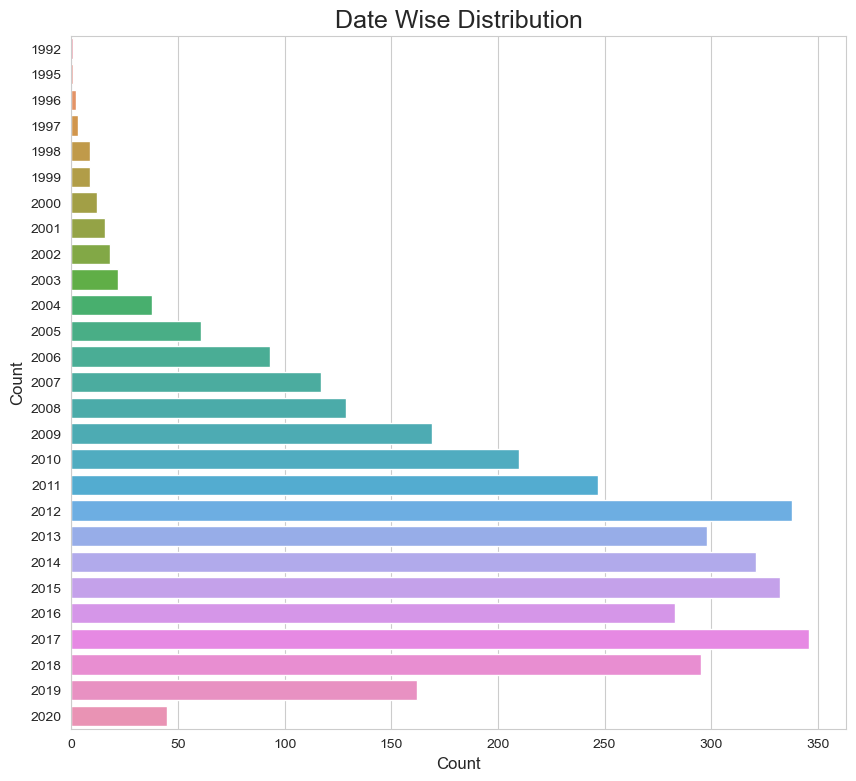

In [37]:
## plot horizontal barplot to show the Date wise distribution
plt.figure(figsize=(10,9))
sns.barplot(x=b1.values,y=b1.index,orient='h')
plt.title("Date Wise Distribution",fontsize=18)
plt.xlabel("Count",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

In this visualization, we can see that most of the car buy in 2017

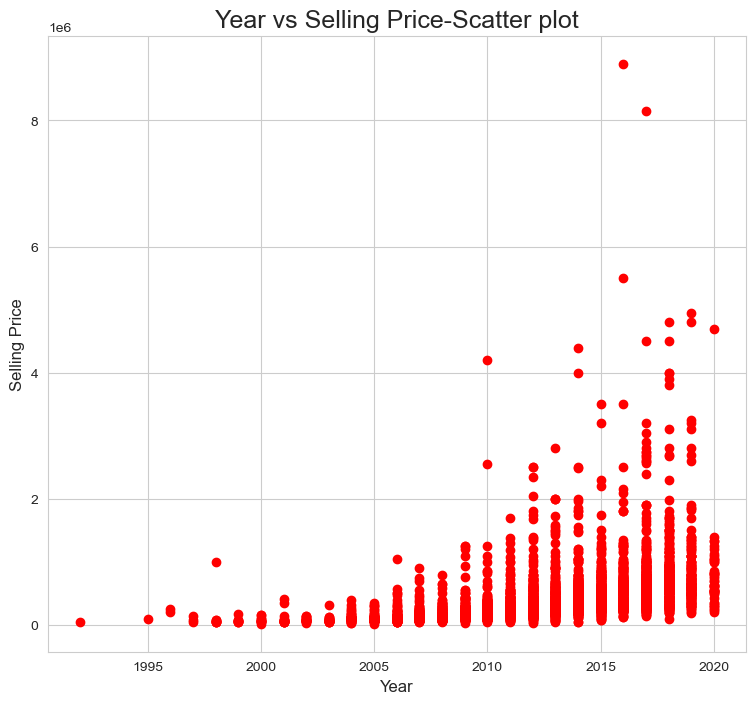

In [38]:
## Scatter plot between year and selling price to see how the prices varies over the years
plt.figure(figsize=(9,8))
plt.scatter(df["year"],df["selling_price"],color="red")
plt.title("Year vs Selling Price-Scatter plot",fontsize=18)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Selling Price",fontsize=12)
plt.show()

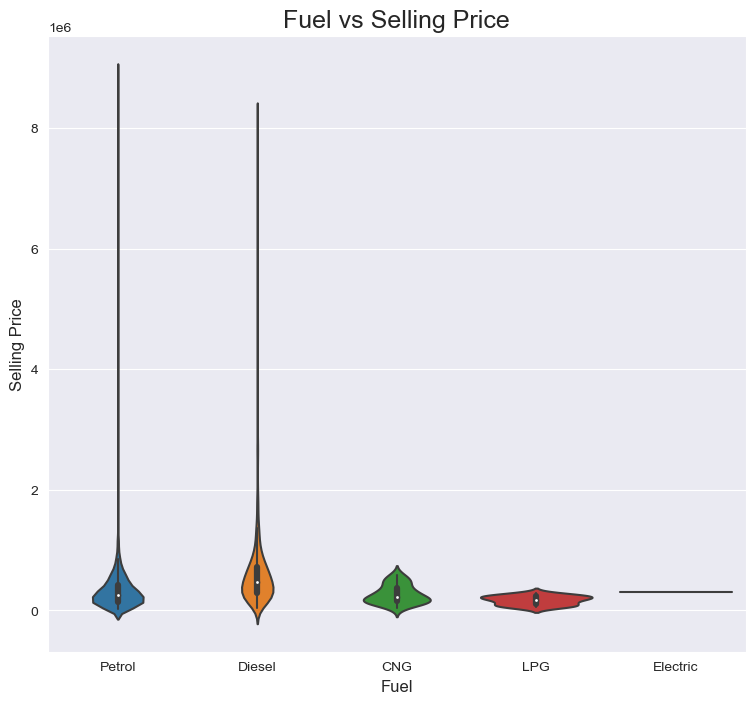

In [39]:
## plot a violin plot to show selling price for different fuel type
sns.set_style("darkgrid")
plt.figure(figsize=(9,8))
sns.violinplot(x=df["fuel"],y=df["selling_price"])
plt.title("Fuel vs Selling Price",fontsize=18)
plt.xlabel("Fuel",fontsize=12)
plt.ylabel("Selling Price",fontsize=12)
plt.show()

Here, we can clearly see the difference of selling price of different fuel type, like petrol fuel has highest selling price.

<Figure size 1100x800 with 0 Axes>

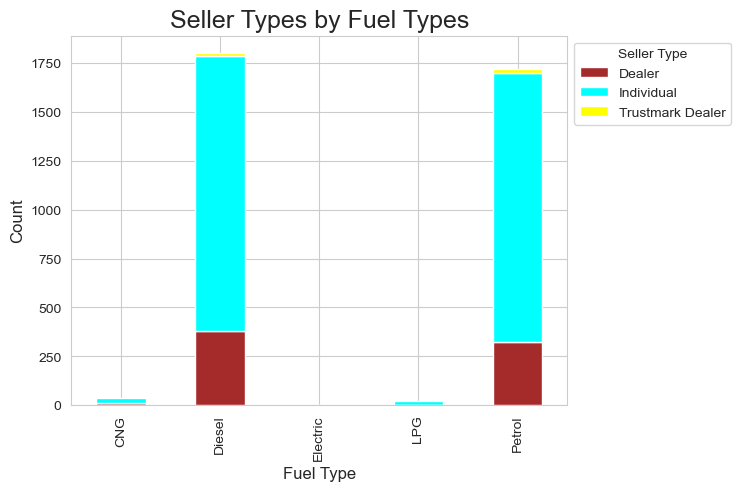

In [40]:
## Stacked bar chart for seller type by fuel types
a1=df.groupby(["fuel","seller_type"]).size().unstack()
sns.set_style("whitegrid")
plt.figure(figsize=(11,8))
a1.plot(kind="bar",stacked= True,color=["brown","cyan","yellow"])
plt.xlabel("Fuel Type" , fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.legend(title="Seller Type",bbox_to_anchor=(1,1))
plt.title("Seller Types by Fuel Types",fontsize=18)
plt.show()

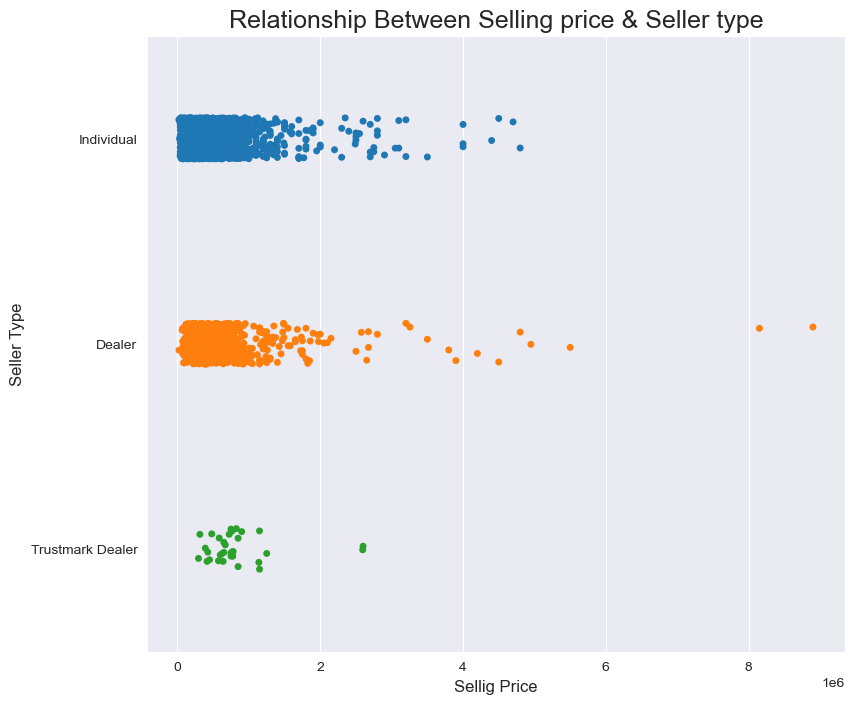

In [41]:
## plot a striplot to show differences in prices based on who is selling the car
sns.set_style("darkgrid")
plt.figure(figsize=(9,8))
sns.stripplot(x=df["selling_price"],y=df["seller_type"])
plt.title("Relationship Between Selling price & Seller type",fontsize=18)
plt.xlabel("Sellig Price",fontsize=12)
plt.ylabel("Seller Type",fontsize=12)
plt.show()

It shows that price is getting high when Dealer is selling the car.

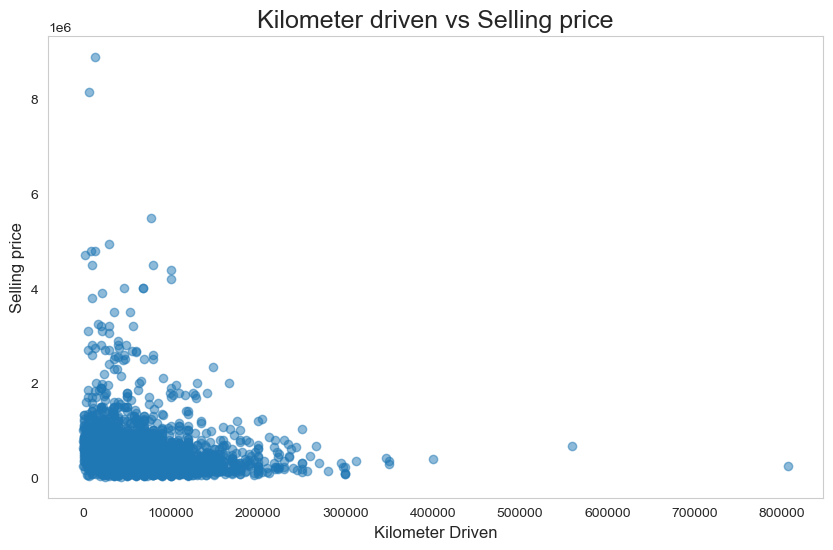

In [42]:
## plot a scatter plot to visualise the relationship between km_driven and selling price
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
plt.scatter(df["km_driven"],df["selling_price"],alpha=0.5)
plt.xlabel("Kilometer Driven",fontsize=12)
plt.ylabel("Selling price",fontsize=12)
plt.title("Kilometer driven vs Selling price",fontsize=18)
plt.grid()
plt.show()

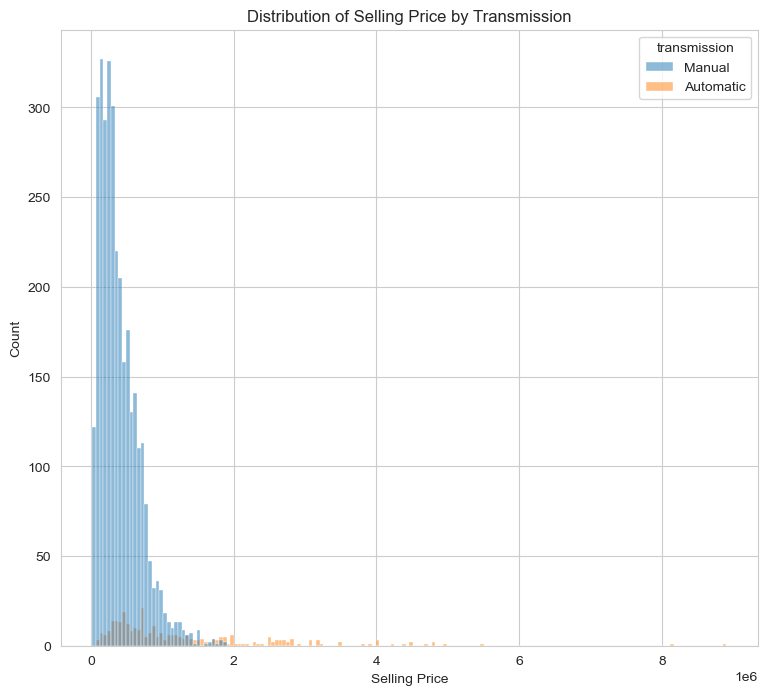

In [43]:
# Plotting the histplot to show the distribution of selling price and transmission
sns.set_style("whitegrid")
plt.figure(figsize=(9,8))
sns.histplot(data=df, x='selling_price', hue='transmission')
plt.xlabel('Selling Price')
plt.ylabel('Count')
plt.title('Distribution of Selling Price by Transmission')
plt.show()

Here, Manual transmission's car has highest selling price.

In [44]:
# Displaying a correlation
corr=df.corr()
corr

,year,selling_price,km_driven
year,1.00000,0.424260,-0.417490
selling_price,0.42426,1.000000,-0.187359
km_driven,-0.41749,-0.187359,1.000000


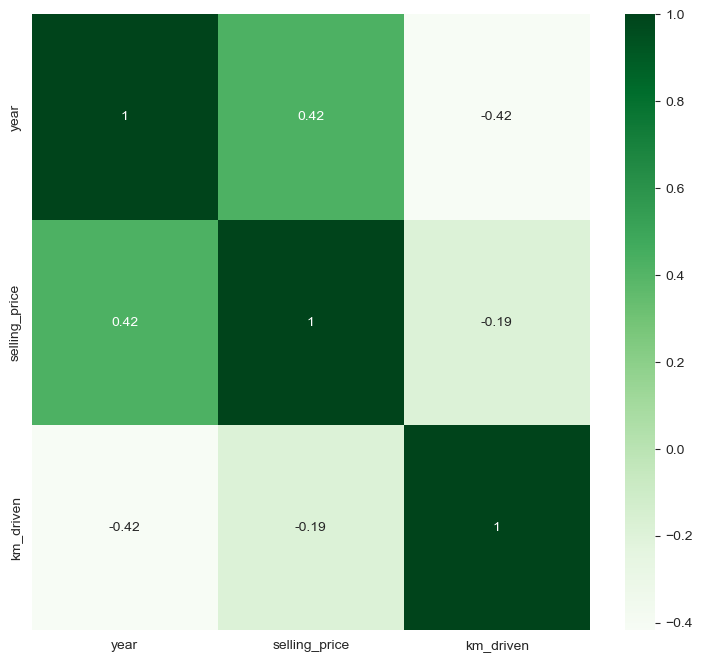

In [45]:
## Displaying a heatmap for correlation
plt.figure(figsize=(9,8))
sns.heatmap(corr,annot=True,cmap="Greens")
plt.show()

<Figure size 1000x800 with 0 Axes>

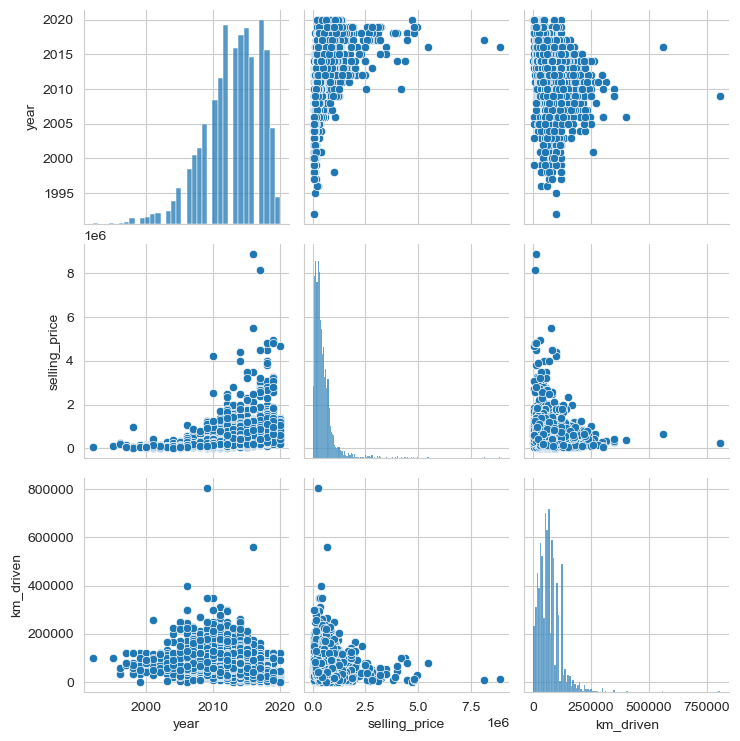

In [46]:
# plotting a pairplot
plt.figure(figsize=(10,8))
sns.pairplot(df)
plt.show()

## Preprocessing in machine learning

### Label Encoding

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
le=LabelEncoder()

columns=["fuel","seller_type","transmission","owner"]
for column in columns:
    df[column]=le.fit_transform(df[column])
    
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,4,1,1,0
1,2007,135000,50000,4,1,1,0
2,2012,600000,100000,1,1,1,0
3,2017,250000,46000,4,1,1,0
4,2014,450000,141000,1,1,1,2


# Selecting dependent and independent features

In [49]:
## selecting dependent and independent features
x=df.drop(["selling_price"],axis=1)
y=df["selling_price"]
print(type(x))
print(type(y))
print(x.shape,y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(3577, 6) (3577,)


## Dividing the data into training and testing data

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2861, 6)
(716, 6)
(2861,)
(716,)


##  Creatiing a function to generate mean absolute error, mean squared error, root mean squared error, r2 score and to compute training and testing score

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [53]:
def eval_metrics(y_test,y_pred):
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    r2=r2_score(y_test,y_pred)
    print("Mean Absolute Error:",mae)
    print("Mean Squared Error:",mse)
    print("Root Mean Squared Error:",rmse)
    print("R2-Score:",r2)
    
def mscore(model):
    print("Training Score:",model.score(x_train,y_train))
    print("Testing Score:",model.score(x_test,y_test))

## Applying Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
leg_reg=LinearRegression()
leg_reg.fit(x_train,y_train)


LinearRegression()

In [56]:
ypred_legreg=leg_reg.predict(x_test)
print(ypred_legreg[:30])  ## displaying the top 30 values

[ 480600.41173972  610679.42473894  620178.60443437  538803.79432516
  689800.28495699  318943.48084083  223822.41187342  470258.33516385
  442512.08631238   25198.95260209  537781.74187121  580991.06206843
  173873.55890816  587059.42780837  131657.96867074  219868.90269412
  433337.66286683  481845.06181493  537783.42895333 1552163.10109387
 1242825.7911292   -42901.65001297    7693.05217193  238739.30977699
  323396.4620374   338093.80098736  204952.00479054 1317869.89348774
   -2795.34885374 1113169.48129509]


## Evaluation

In [57]:
eval_metrics(y_test,ypred_legreg)

Mean Absolute Error: 218802.79852657396
Mean Squared Error: 173905976987.4247
Root Mean Squared Error: 417020.3556032064
R2-Score: 0.4651084438801817


In [58]:
r2_scr_legreg=r2_score(y_test,ypred_legreg)
print(r2_scr_legreg)

0.4651084438801817


In [59]:
mscore(leg_reg)

Training Score: 0.4121268610627301
Testing Score: 0.4651084438801817


## KNN-Regressor

In [60]:
from sklearn.neighbors import KNeighborsRegressor

In [61]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [62]:
ypred_knn=knn.predict(x_test)
print(ypred_knn[:30]) 

[378000.  511200.  590000.  539999.8 423200.  179999.6 210999.8 173000.
 268600.  107000.  695000.  565000.  245799.8 470000.  116600.  230800.
 471000.  615000.  319999.8 570800.  494200.  617000.  372200.  226200.
 352000.  201999.8 250599.8 358800.  247200.  318199.8]


## Evaluation

In [63]:
eval_metrics(y_test,ypred_knn)

Mean Absolute Error: 250786.3067039106
Mean Squared Error: 259883028532.9315
Root Mean Squared Error: 509787.23849556246
R2-Score: 0.20066440527709561


In [64]:
r2_scr_knn=r2_score(y_test,ypred_knn)
print(r2_scr_knn)

0.20066440527709561


In [65]:
mscore(knn)

Training Score: 0.41697027621566773
Testing Score: 0.20066440527709561


## Ridge Regression

In [66]:
from sklearn.linear_model import Ridge,Lasso

In [67]:
Rd=Ridge(alpha=0.5)
Rd.fit(x_train,y_train)

Ridge(alpha=0.5)

In [68]:
ypred_rd=Rd.predict(x_test)
print(ypred_rd[:30])     ## displaying the top 30 values

[ 480731.58109562  610844.83173828  620308.90051912  538929.57262684
  690042.15688802  319020.63390104  223936.61604603  470364.82897609
  442620.63924101   25247.04360498  537990.59280023  581205.04505228
  173990.35538231  587238.08558458  131753.54809394  219991.50977632
  433450.17104855  481943.91900897  537929.93960981 1550715.7469101
 1241361.84023541  -42808.48076747    7797.89033423  238866.22153959
  323491.88782221  338113.40078612  205061.90428276 1316383.22038774
   -2766.19061846 1111638.03507365]


## Evaluation

In [69]:
eval_metrics(y_test,ypred_rd)

Mean Absolute Error: 218785.71045487028
Mean Squared Error: 173960753628.77344
Root Mean Squared Error: 417086.02665250417
R2-Score: 0.4649399645476274


In [70]:
r2_scr_rd=r2_score(y_test,ypred_rd)
print(r2_scr_rd)

0.4649399645476274


In [71]:
mscore(Rd)

Training Score: 0.41212597148430796
Testing Score: 0.4649399645476274


## Lasso Regressor

In [72]:
Ls=Lasso(alpha=0.1)
Ls.fit(x_train,y_train)

Lasso(alpha=0.1)

In [73]:
ypred_ls=Ls.predict(x_test)
print(ypred_ls[:30])   ## displaying the top 30 values

[ 480600.60132585  610679.57795924  620178.72143629  538803.89775239
  689799.96581216  318942.94694671  223822.59930074  470258.41067438
  442512.16107553   25199.0918248   537782.06357872  580990.70159726
  173873.91713861  587059.67925714  131658.1697561   219869.18533014
  433337.82755738  481845.13053851  537783.55426212 1552162.14047499
 1242824.99651398  -42901.42696275    7693.37978244  238739.51229371
  323396.68346448  338093.77012481  204952.27233718 1317868.30386139
   -2795.27609614 1113167.8220835 ]


## Evaluation

In [74]:
eval_metrics(y_test,ypred_ls)

Mean Absolute Error: 218802.77838306827
Mean Squared Error: 173906024540.0426
Root Mean Squared Error: 417020.4126179468
R2-Score: 0.4651082976201496


In [75]:
r2_scr_ls=r2_score(y_test,ypred_ls)
print(r2_scr_ls)

0.4651082976201496


In [76]:
mscore(Ls)

Training Score: 0.4121268610620077
Testing Score: 0.4651082976201496


## Applying Random Forest Regressor

In [77]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
rf=RandomForestRegressor(n_estimators=100,max_depth=8, min_samples_split=11, random_state=5)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=8, min_samples_split=11, random_state=5)

In [79]:
ypred_rf=rf.predict(x_test)
print(ypred_rf[:30])

[ 384814.34248698  516190.95569614  722722.15316889  519372.43876089
  653962.26505114  365463.2042904   212332.10647956  184603.90601884
  241015.8081781   107781.12249585  594002.07443895  418014.45806598
  217232.03483827  496231.0883215   163153.30352813  230039.89162535
  358917.19162505  415276.85391851  400745.80058503 2920871.73950945
  711632.31974985   81335.44636273  107476.53700535  226963.79385493
  326688.08112383  374152.81437363  229342.57434685 2065113.35662051
  103771.22141823 1250264.21465326]


### Evaluation

In [80]:
eval_metrics(y_test,ypred_rf)

Mean Absolute Error: 174756.76107871457
Mean Squared Error: 123704644035.51955
Root Mean Squared Error: 351716.70991796727
R2-Score: 0.6195152651240277


In [81]:
r2_scr_rf=r2_score(y_test,ypred_rf)
print(r2_scr_rf)

0.6195152651240277


In [82]:
mscore(rf)

Training Score: 0.6606528123618618
Testing Score: 0.6195152651240277


## Applying Decision Tree Regressor

In [83]:
from sklearn.tree import DecisionTreeRegressor

In [84]:
dt=DecisionTreeRegressor(max_depth=8, min_samples_split=15)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_split=15)

In [85]:
ypred_dt=dt.predict(x_test)
print(ypred_dt[:30]) 

[ 379024.85572139  327000.          678753.5942029   527738.77985075
  656024.01204819  313499.9         222770.40983607  195681.81818182
  245759.24074074  111258.06451613  648888.85185185  463081.05405405
  225531.87234043  503882.29411765  190339.52252252  225531.87234043
  379024.85572139  379024.85572139  406130.34782609 3021875.
  819590.86363636   94699.9         207624.875       222770.40983607
  309857.10204082  313499.9         225531.87234043 2293571.42857143
  111258.06451613 2085000.        ]


### Evaluation

In [86]:
eval_metrics(y_test,ypred_dt)

Mean Absolute Error: 187317.08077712028
Mean Squared Error: 131668806728.3819
Root Mean Squared Error: 362861.966494674
R2-Score: 0.5950194803915421


In [87]:
r2_scr_dt=r2_score(y_test,ypred_dt)
print(r2_scr_dt)

0.5950194803915421


In [88]:
mscore(dt)

Training Score: 0.6389117611916091
Testing Score: 0.5950194803915421


## XGBoost

In [89]:
import xgboost as xgb

In [90]:
xgboost = xgb.XGBRegressor(n_estimators=100, random_state=1)
xgboost.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1, ...)

In [91]:
# Predict on the test set
ypred_xg = xgboost.predict(x_test)
print(ypred_xg[:30])

[ 396982.7     455352.22    602754.4     490811.03    651357.7
  401831.62    179626.47    145777.95    245940.64     82865.055
  681184.      563489.1     191920.3     550776.8     165795.72
  239970.45    353076.97    374605.7     351582.38   1440925.
  646819.6       5150.7676   59441.117   240680.56    359003.9
  366808.34    238326.38   3959794.2      85411.984   543988.56  ]


### Evaluation

In [92]:
eval_metrics(y_test,ypred_xg)

Mean Absolute Error: 205095.6138910901
Mean Squared Error: 193072814537.1079
Root Mean Squared Error: 439400.51722444285
R2-Score: 0.4061560160197686


In [93]:
r2_scr_xg=r2_score(y_test,ypred_xg)
print(r2_scr_xg)

0.4061560160197686


In [94]:
mscore(xgboost)

Training Score: 0.9038779798250633
Testing Score: 0.4061560160197686


## Gradient Boosting Regressor

In [95]:
from sklearn.ensemble import GradientBoostingRegressor

In [96]:
gbm = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=1)
gbm.fit(x_train, y_train)

GradientBoostingRegressor(n_estimators=200, random_state=1)

In [97]:
# Predict on the test set
ypred_gbm = gbm.predict(x_test)
print(ypred_gbm[:30])   ## displaying top 30 values

[ 391789.90295986  541363.53953898  643681.12655727  482230.74676116
  646493.30080932  454010.64213753  195423.50995238  138329.27129172
  290135.54946556   82065.08416625  570090.45095793  458722.41214971
  199941.08177553  538488.62740956  153816.31704006  227947.12256367
  353343.55111225  371177.82074114  407861.4056546  1618353.71387526
  253327.43617522   94685.49722414  108251.74630869  187799.02335979
  290261.25739297  374880.3067014   224811.80813218 1645170.82296208
   -9506.24981531  834212.11798604]


### Evaluation

In [98]:
eval_metrics(y_test,ypred_gbm)

Mean Absolute Error: 178287.63788273942
Mean Squared Error: 142541927679.68536
Root Mean Squared Error: 377547.2522475635
R2-Score: 0.561576463157337


In [99]:
r2_scr_gbm=r2_score(y_test,ypred_gbm)
print(r2_scr_gbm)


0.561576463157337


In [100]:
mscore(gbm)

Training Score: 0.7202884521077979
Testing Score: 0.561576463157337


## Compare the models

In [101]:
Model=pd.DataFrame({"Models":["Linear Regression","KNN-Regression","Ridge","Lasso","Random Forest Regressor","Decision Tree Regressor","XG Boost","Gradient Boosting Regressor"],
                   "R2-Score":[r2_scr_legreg,r2_scr_knn,r2_scr_rd,r2_scr_ls,r2_scr_rf,r2_scr_dt,r2_scr_xg,r2_scr_gbm]})
Model

,Models,R2-Score
0,Linear Regression,0.465108
1,KNN-Regression,0.200664
2,Ridge,0.464940
3,Lasso,0.465108
4,Random Forest Regressor,0.619515
5,Decision Tree Regressor,0.595019
6,XG Boost,0.406156
7,Gradient Boosting Regressor,0.561576


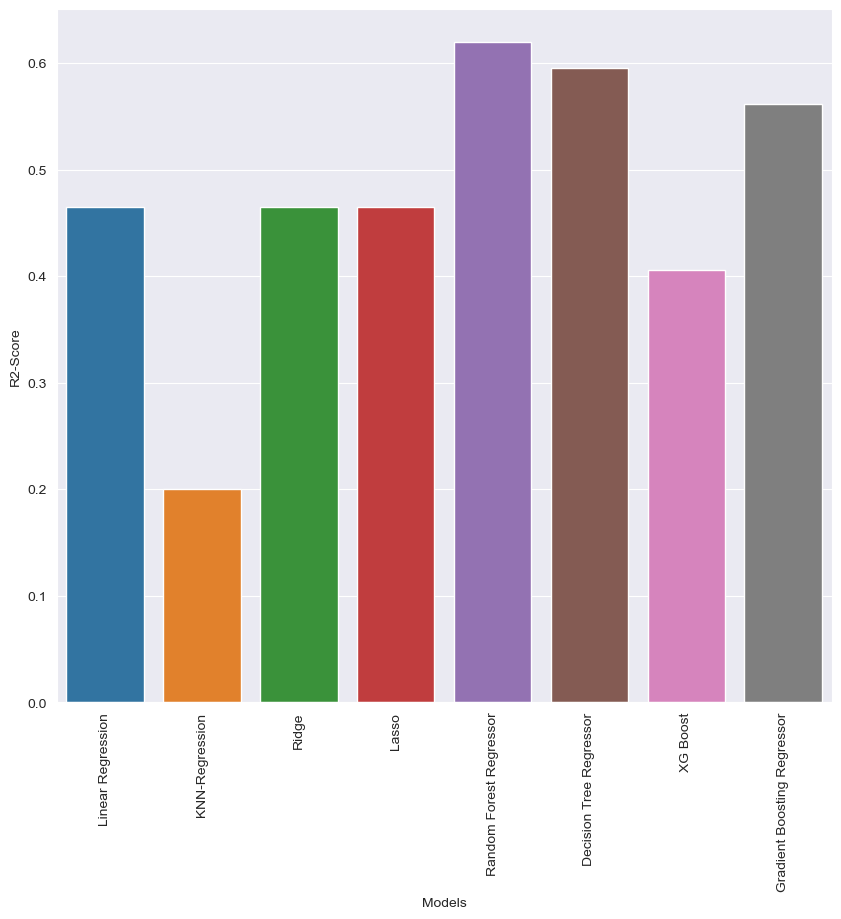

In [102]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,9))
sns.barplot(x=Model["Models"],y=Model["R2-Score"])
plt.xticks(rotation=90)
plt.show()

After comparison we can see that Gradient Boosting Regressor is the best model as it acquire highest r2-score value (61%) as compare to others

## Final model (Gradient Boosting Regressor) based on Evaluation from model_performance dataframe

In [121]:
r_f=RandomForestRegressor(n_estimators=100,max_depth=8, min_samples_split=11, random_state=5)
r_f.fit(x_train,y_train)

RandomForestRegressor(max_depth=8, min_samples_split=11, random_state=5)

In [122]:
ypred_model=model.predict(x_test)
print(ypred_model[:30])

[ 384814.34248698  516190.95569614  722722.15316889  519372.43876089
  653962.26505114  365463.2042904   212332.10647956  184603.90601884
  241015.8081781   107781.12249585  594002.07443895  418014.45806598
  217232.03483827  496231.0883215   163153.30352813  230039.89162535
  358917.19162505  415276.85391851  400745.80058503 2920871.73950945
  711632.31974985   81335.44636273  107476.53700535  226963.79385493
  326688.08112383  374152.81437363  229342.57434685 2065113.35662051
  103771.22141823 1250264.21465326]


## Save the model

In [123]:
import pickle

In [124]:
pickle.dump(r_f, open('car_predict.pkl', 'wb'))    # Saving the best performing model
pickle.dump(df, open('data.pkl', 'wb'))                # Saving the DataFrame

## Load the Model

In [125]:
loaded_model = pickle.load(open('car_predict.pkl', 'rb'))   # rb = read binary

In [126]:
satisfaction_pred = loaded_model.predict(x_test)
print(satisfaction_pred[:30])

[ 384814.34248698  516190.95569614  722722.15316889  519372.43876089
  653962.26505114  365463.2042904   212332.10647956  184603.90601884
  241015.8081781   107781.12249585  594002.07443895  418014.45806598
  217232.03483827  496231.0883215   163153.30352813  230039.89162535
  358917.19162505  415276.85391851  400745.80058503 2920871.73950945
  711632.31974985   81335.44636273  107476.53700535  226963.79385493
  326688.08112383  374152.81437363  229342.57434685 2065113.35662051
  103771.22141823 1250264.21465326]


### Taking some sample of 20 data points from original dataset

In [127]:
df1=df.sample(20)
df1

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
3830,2009,120000,70000,4,1,1,1
3390,2015,465000,130000,1,1,1,0
3696,2018,231999,20000,4,1,1,0
2904,1999,70000,70000,4,1,1,1
1818,2013,210000,42000,4,1,1,4
799,2013,350000,100000,4,1,1,0
3273,2013,211000,80000,1,1,1,0
947,2014,260000,37605,4,0,1,0
675,2015,190000,70000,4,1,1,0
4320,2008,114999,66782,4,1,1,2


In [128]:
df1.shape

(20, 7)

## we have to save our data in csv file

In [129]:
df1.to_csv('sample_submission_car.csv', index=False)

In [130]:
df2=pd.read_csv("sample_submission_car.csv")
df2.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2009,120000,70000,4,1,1,1
1,2015,465000,130000,1,1,1,0
2,2018,231999,20000,4,1,1,0
3,1999,70000,70000,4,1,1,1
4,2013,210000,42000,4,1,1,4


In [131]:
df2.shape

(20, 7)

drop selling_price column beacuase we have to predict on independent data

In [132]:
# dropping selling_price column
df2.drop("selling_price",axis=1,inplace=True)

In [133]:
model.predict(df2)

array([ 163153.30352813,  518748.51325697,  438952.24569016,
         72437.6535888 ,  266678.81846558,  310816.27590407,
        387326.7456097 ,  337625.23078911,  321101.11708934,
        146168.57072509,  570807.60690426,  466822.50076107,
        721531.5288596 ,  365167.15844245,  507806.77796513,
        676820.97864021,  390114.98771951,  487067.80144535,
        618278.96659994, 1981894.75672945])